In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dongeorge/beer-consumption-sao-paulo")

print("Path to dataset files:", path)

100%|██████████| 5.24k/5.24k [00:00<00:00, 8.61MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dongeorge/beer-consumption-sao-paulo/versions/2


In [ ]:
# prompt: ler em dataframe os dados

import pandas as pd

df = pd.read_csv(path + '/Consumo_cerveja.csv', sep=',')

print(df.head())


         Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900  


In [ ]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [ ]:
# prompt: Usando o DataFrame df: multiplicar coluna 'Consumo de cerveja (litros)' por 1000

# Multiply the 'Consumo de cerveja (litros)' column by 1000
df['Consumo de cerveja (litros)'] = df['Consumo de cerveja (litros)'] * 1000
# Display the modified dataframe to verify the changes
#print(df.head())


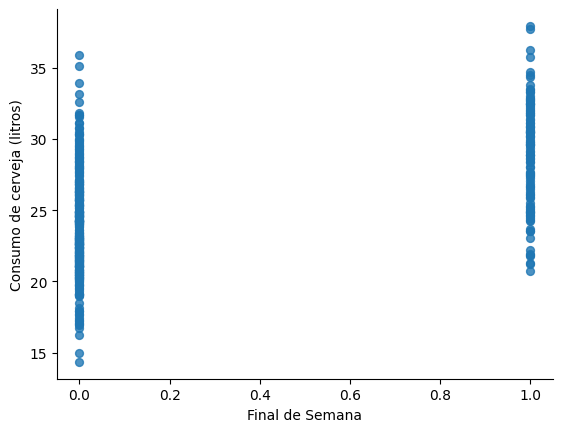

In [ ]:
# @title Final de Semana vs Consumo de cerveja (litros)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Final de Semana', y='Consumo de cerveja (litros)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

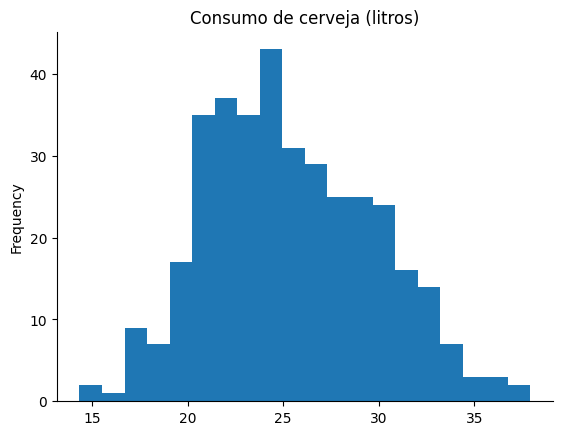

In [ ]:
# @title Consumo de cerveja (litros)

from matplotlib import pyplot as plt
df['Consumo de cerveja (litros)'].plot(kind='hist', bins=20, title='Consumo de cerveja (litros)')
plt.gca().spines[['top', 'right',]].set_visible(False)

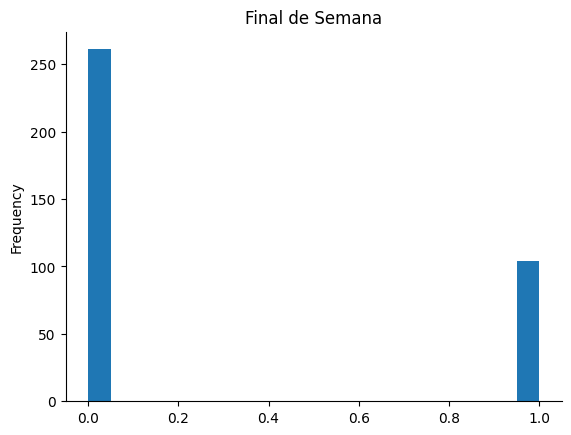

In [ ]:
# @title Final de Semana

from matplotlib import pyplot as plt
df['Final de Semana'].plot(kind='hist', bins=20, title='Final de Semana')
plt.gca().spines[['top', 'right',]].set_visible(False)

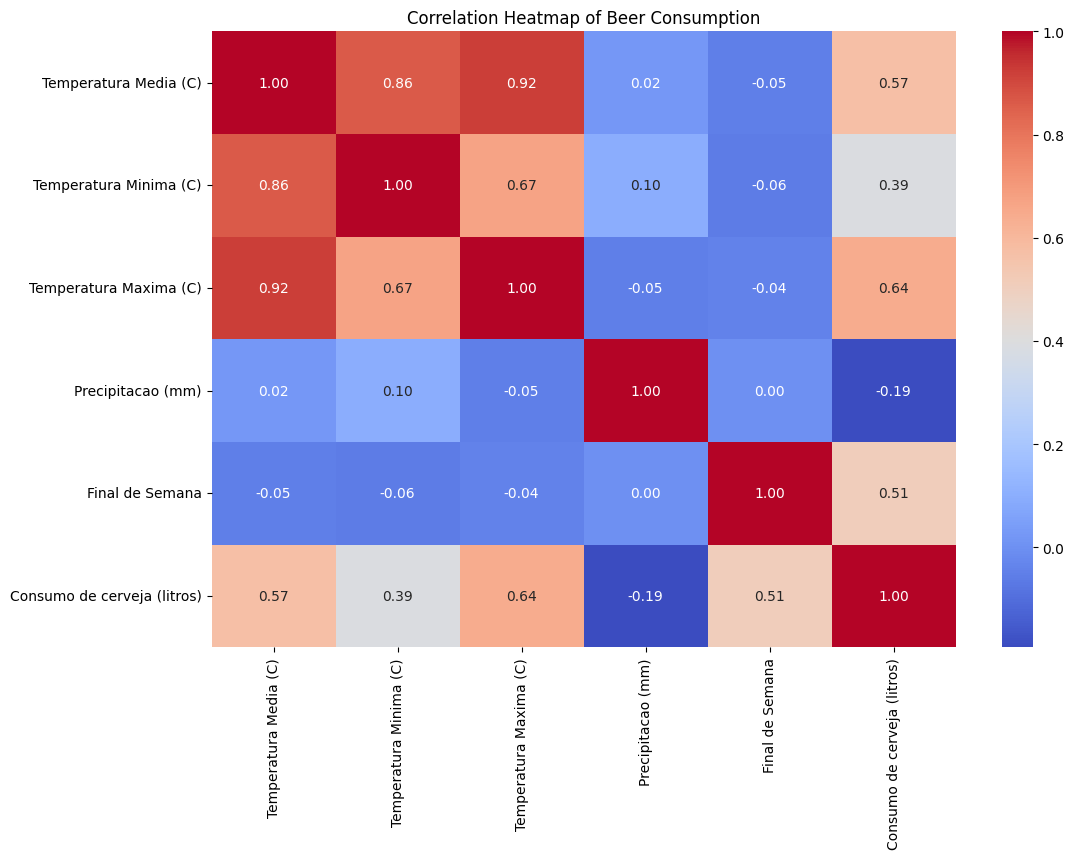

In [ ]:
# prompt: Usando o DataFrame df: gerar mapa de correlação entre consumo de cerveja

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert relevant columns to numeric, handling errors by coercing to NaN
for col in ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

# Drop rows with NaN values resulting from the conversion
df = df.dropna()

# Select only numeric features for correlation
numeric_features = df.select_dtypes(include=['number'])

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_features.corr()  # Calculate the correlation matrix for numeric features only

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Beer Consumption')
plt.show()


In [ ]:
# prompt: gerar modelo de regressão linear  para consumo de cerveja

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with preprocessed data
# (as in the previous code example)

# Define features (X) and target variable (y)
X = df[['Temperatura Media (C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana']]
y = df['Consumo de cerveja (litros)']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 5699451.793236822
R-squared: 0.7427938181737361
Coefficients: [  96.51350744  -62.81587287  630.68847172  -43.41427962 5147.18828505]
Intercept: 6419.258105234818
